In [1]:
import folium
import os
import numpy as np

from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt 
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from shapely.geometry import MultiPolygon, Polygon
import rasterio as rio
from rasterio.plot import show
import rasterio.mask
import fiona

In [2]:
user = 'andreistan97'

In [3]:
password = 'dinamo1948'

In [4]:
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus/#/home')

In [5]:
nReserve = gpd.read_file(r'C:\Users\andre\OneDrive\Documents\QGIS\simplu.shp')
nReserve

id      nume                                           geometry
0   7  Costache  POLYGON ((26.07214 47.04699, 26.07214 47.30713...

In [6]:
m = folium.Map([47.13, 26.36], zoom_start=11)

folium.GeoJson(nReserve).add_to(m)
m

C:\Users\andre\Anaconda3\envs\mynewenv\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


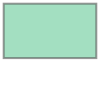

In [7]:
footprint = None
for i in nReserve['geometry']:
    footprint = i
    
footprint

In [8]:
products = api.query(footprint,
                     date = ('20191201', '20200123'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0,10))

In [9]:
len(products)

2

In [10]:
products_gdf = api.to_geodataframe(products)
products_gdf

title  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  S2A_MSIL2A_20191215T092401_N0213_R093_T35TMN_2...   
b6f079ad-57d7-420c-bfda-b89237d96498  S2A_MSIL2A_20191205T092351_N0213_R093_T35TMN_2...   

                                                                                   link  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
b6f079ad-57d7-420c-bfda-b89237d96498  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                       link_alternative  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
b6f079ad-57d7-420c-bfda-b89237d96498  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                              link_icon  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   
b6f079ad-57d7-420c-bfda-b89237d96498  https://scihub.copernicus.eu/dhus/odata/v1/Pro...   

                                                                                summary  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  Date: 2019-12-15T09:24:01.024Z, Instrument: MS...   
b6f079ad-57d7-420c-bfda-b89237d96498  Date: 2019-12-05T09:23:51.024Z, Instrument: MS...   

                                               beginposition  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3 2019-12-15 09:24:01.024   
b6f079ad-57d7-420c-bfda-b89237d96498 2019-12-05 09:23:51.024   

                                                 endposition  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3 2019-12-15 09:24:01.024   
b6f079ad-57d7-420c-bfda-b89237d96498 2019-12-05 09:23:51.024   

                                               ingestiondate  orbitnumber  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3 2019-12-15 15:45:17.235        23399   
b6f079ad-57d7-420c-bfda-b89237d96498 2019-12-05 17:38:40.465        23256   

                                      relativeorbitnumber  ...  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3                   93  ...   
b6f079ad-57d7-420c-bfda-b89237d96498                   93  ...   

                                      processingbaseline  processinglevel  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3               02.13         Level-2A   
b6f079ad-57d7-420c-bfda-b89237d96498               02.13         Level-2A   

                                      producttype  platformname     size  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3      S2MSI2A    Sentinel-2  1.03 GB   
b6f079ad-57d7-420c-bfda-b89237d96498      S2MSI2A    Sentinel-2  1.09 GB   

                                                                               filename  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  S2A_MSIL2A_20191215T092401_N0213_R093_T35TMN_2...   
b6f079ad-57d7-420c-bfda-b89237d96498  S2A_MSIL2A_20191205T092351_N0213_R093_T35TMN_2...   

                                                                   level1cpdiidentifier  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  S2A_OPER_MSI_L1C_TL_EPAE_20191215T110058_A0233...   
b6f079ad-57d7-420c-bfda-b89237d96498  S2A_OPER_MSI_L1C_TL_MTI__20191205T095531_A0232...   

                                                                             identifier  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  S2A_MSIL2A_20191215T092401_N0213_R093_T35TMN_2...   
b6f079ad-57d7-420c-bfda-b89237d96498  S2A_MSIL2A_20191205T092351_N0213_R093_T35TMN_2...   

                                                                      uuid  \
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3   
b6f079ad-57d7-420c-bfda-b89237d96498  b6f079ad-57d7-420c-bfda-b89237d96498   

                                                                               geometry  
6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3  MULTIPOLYGON (((25.68759 46.85818, 26.87312 46...  
b6f079ad-57d7-420c-bfda-b89237d96498  MULTIPOLYGON (((25.68759 46.85818, 26.86892 46...  

[2 rows x 35 columns]

In [11]:
api.download("6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3")

{'id': '6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3',
 'title': 'S2A_MSIL2A_20191215T092401_N0213_R093_T35TMN_20191215T120335',
 'size': 1107817289,
 'md5': 'DC4D8EF4F4172DD56DB2BDFE9EF70753',
 'date': datetime.datetime(2019, 12, 15, 9, 24, 1, 24000),
 'footprint': 'POLYGON((27.12946679637578 47.44275339475449,27.06745820537972 47.30271817076861,27.002758593008124 47.157632793005206,26.93814144359945 47.01254736944157,26.874465605306927 46.86737621037376,26.873124020062892 46.864309346714705,25.687588500476014 46.858175957972115,25.662865290445673 47.84591482730969,27.130470361916803 47.85362771191058,27.12946679637578 47.44275339475449))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('6649b7ea-4ab8-4e5a-bb82-4be64d9b4ec3')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 12, 15, 15, 51, 27, 118000),
 'Ingestion Date': datetime.datetime(2019, 12, 15, 15, 45, 17, 235000),
 'path': '.\\S2A_MSIL2A_20191215T092401_N0213_R093_T35TMN_20191215T120335.zip',
 'downlo

In [12]:
R10 = 'S2A_MSIL2A_20191215T092401_N0213_R093_T35TMN_20191215T120335.SAFE/GRANULE/L2A_T35TMN_A023399_20191215T092521/IMG_DATA/R10m'

b4 = rio.open(R10+'/T35TMN_20191215T092401_B04_10m.jp2')
b3 = rio.open(R10+'/T35TMN_20191215T092401_B03_10m.jp2')
b2 = rio.open(R10+'/T35TMN_20191215T092401_B02_10m.jp2')

In [13]:
b4.count, b4.width, b4.height

(1, 10980, 10980)

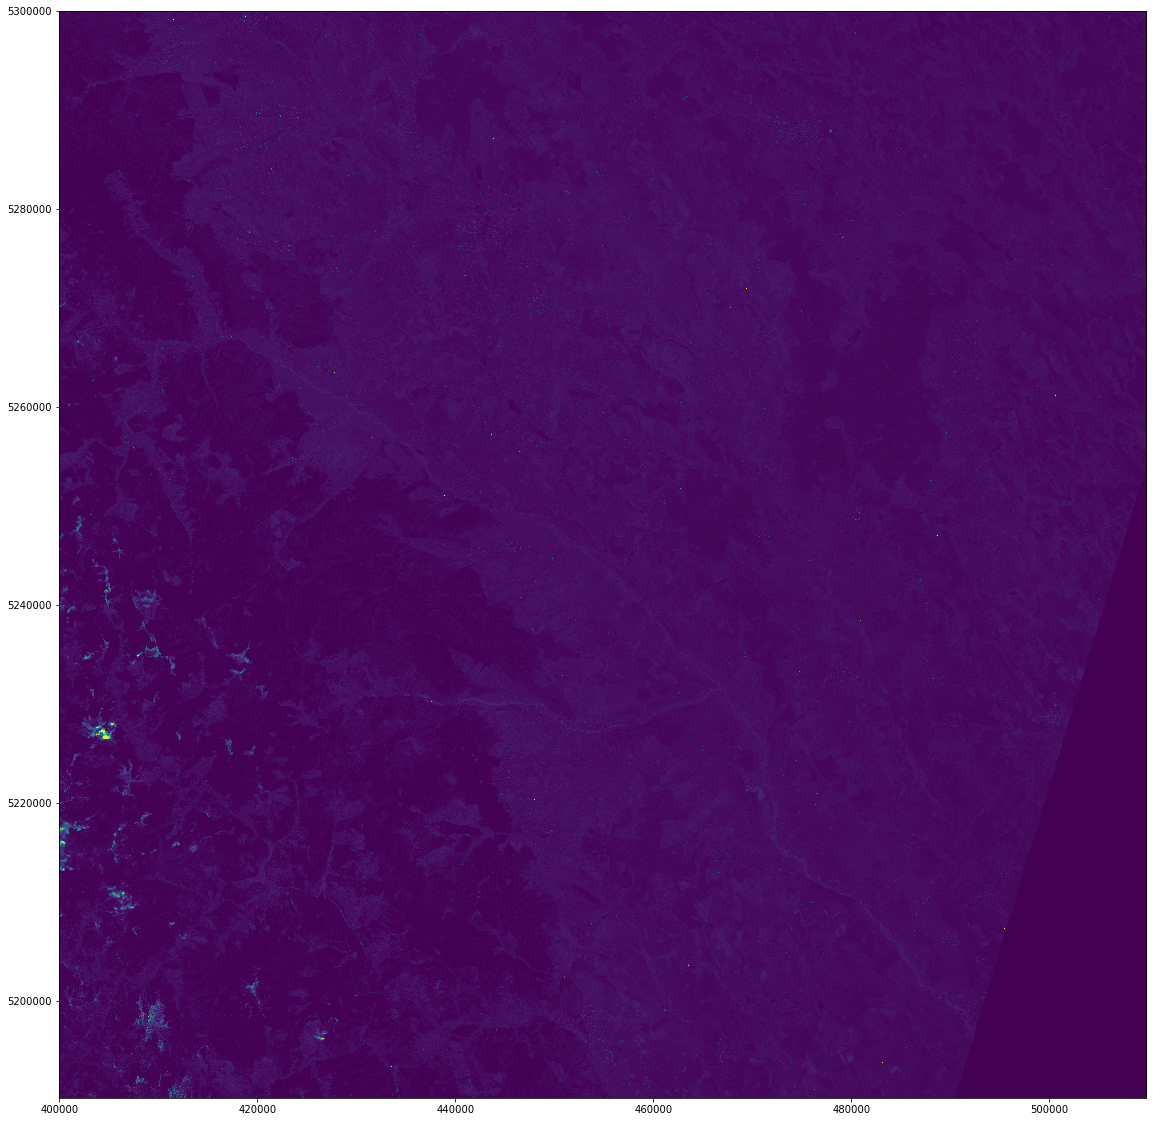

In [14]:
fig, ax = plt.subplots(1, figsize=(20, 20))
show(b4, ax=ax)
plt.show()

In [15]:
with rio.open('RGB.tiff','w',driver='Gtiff', width=b4.width, height=b4.height, 
              count=3,crs=b4.crs,transform=b4.transform, dtype=b4.dtypes[0]) as rgb:
    rgb.write(b2.read(1),1) 
    rgb.write(b3.read(1),2) 
    rgb.write(b4.read(1),3) 
    rgb.close()

In [16]:
nReserve_proj = nReserve.to_crs({'init': 'epsg:32635'})

with rio.open("RGB.tiff") as src:
    out_image, out_transform = rio.mask.mask(src, nReserve_proj.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open("RGB_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


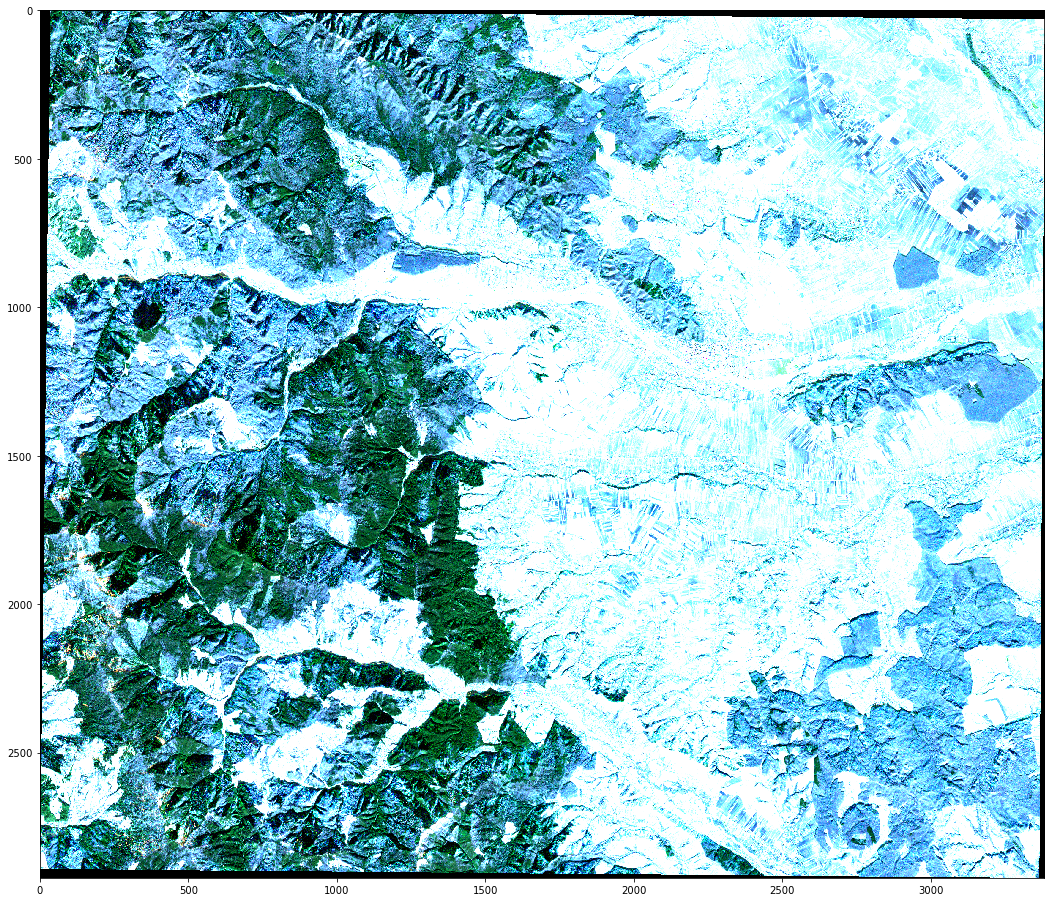

<function matplotlib.pyplot.show(*args, **kw)>

In [17]:
msk = rio.open(r"RGB_masked.tif")
fig, ax = plt.subplots(1, figsize=(18, 18))
show(msk.read([1,2,3]))
plt.show

In [18]:
b4 = rio.open(R10+'/T35TMN_20191215T092401_B04_10m.jp2')
b8 = rio.open(R10+'/T35TMN_20191215T092401_B08_10m.jp2')

In [19]:
red = b4.read()
nir = b8.read()

In [20]:
ndvi = (nir.astype(float)-red.astype(float))/(nir+red)

C:\Users\andre\Anaconda3\envs\mynewenv\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [21]:
meta = b4.meta

meta.update(driver='GTiff')
meta.update(dtype=rasterio.float32)

with rasterio.open('NDVI.tif', 'w', **meta) as dst:
    dst.write(ndvi.astype(rasterio.float32))